# Cross-Country Solar Data Comparison

This notebook compares solar irradiance data across Benin, Sierra Leone, and Togo using object-oriented programming principles.

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

## Class Definitions

### SolarDataSet Class

In [3]:
class SolarDataset:
    def __init__(self, country_name, file_path):
        self.country_name = country_name
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path, parse_dates=["Timestamp"])
        #self.data.set_index('timestamp', inplace=True)

    def clean_data(self):
        self.data['GHI'] = self.data['GHI'].fillna(self.data['GHI'].median())

    def compute_statistics(self):
        return self.data[['GHI', 'DNI', 'DHI']].describe()


### CountryComparator Class

In [4]:
class CountryComparator:
    def __init__(self, datasets):
        self.datasets = datasets

    def compare_means(self):
        stats = {}
        for dataset in self.datasets:
            stats[dataset.country_name] = dataset.data[['GHI', 'DNI', 'DHI']].mean()
        return pd.DataFrame(stats)
    def compare_medians(self):
        stats = {}
        for dataset in self.datasets:
            stats[dataset.country_name] = dataset.data[['GHI', 'DNI', 'DHI']].median()
        return pd.DataFrame(stats)

    def compare_std_devs(self):
        stats = {}
        for dataset in self.datasets:
            stats[dataset.country_name] = dataset.data[['GHI', 'DNI', 'DHI']].std()
        return pd.DataFrame(stats)

    def perform_anova(self):
        results = {}
        for metric in ['GHI', 'DNI', 'DHI']:
            samples = [ds.data[metric].dropna() for ds in self.datasets]
            f_stat, p_val = f_oneway(*samples)
            results[metric] = {'F-statistic': f_stat, 'p-value': p_val}
        return pd.DataFrame(results).T


### VisualizationManager Class

In [5]:
class VisualizationManager:
    def __init__(self, datasets):
        self.datasets = datasets

    def bar_chart(self):
        # Step 1: Compute mean GHI for each dataset
        mean_ghi = {
            ds.country_name: ds.data['GHI'].mean()
            for ds in [benin, sierraleone, togo]
        }
        mean_ghi = pd.Series(mean_ghi).sort_values(ascending=False)

        # Step 2: Plot bar chart
        plt.figure(figsize=(6, 4))
        mean_ghi.plot(kind='bar')
        plt.title('Average GHI by Country')
        plt.ylabel('Mean GHI (W/m²)')
        plt.xlabel('Country')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def plot_boxplots(self):
        datasets = [benin, sierraleone, togo]
        # Step 1: Combine Data
        combined_data = pd.DataFrame()
        for dataset in datasets:
            temp_df = dataset.data[['GHI', 'DNI', 'DHI']].copy()
            temp_df['country'] = dataset.country_name
            combined_data = pd.concat([combined_data, temp_df])

        # Step 2: Reshape Data
        melted_data = pd.melt(combined_data, id_vars=['country'], value_vars=['GHI', 'DNI', 'DHI'],
                            var_name='Metric', value_name='Value')

        # Step 3: Plot Boxplots
        sns.set(style="whitegrid")
        for metric in ['GHI', 'DNI', 'DHI']:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='country', y='Value',hue='country', data=melted_data[melted_data['Metric'] == metric],
                        palette='Set2', legend='full')
            plt.title(f'{metric} Comparison by Country')
            plt.xlabel('Country')
            plt.ylabel(metric)
            plt.show()


## Data Loading

In [6]:
# Instantiate SolarDataset objects
benin = SolarDataset('Benin', '../data/benin_clean.csv')
sierraleone = SolarDataset('Sierra Leone', '../data/sierraleone_clean.csv')
togo = SolarDataset('Togo', '../data/togo_clean.csv')

# Load and clean data
for dataset in [benin, sierraleone, togo]:
    dataset.load_data()
    dataset.clean_data()


## Statistical Analysis of Countries

In [7]:
# Compare datasets
comparator = CountryComparator([benin, sierraleone, togo])
mean_comparison = comparator.compare_means()
median_comparison = comparator.compare_medians()
std_comparison = comparator.compare_std_devs()
anova_results = comparator.perform_anova()

# Display results
print("Mean Comparison:")
display(mean_comparison)

print("\nMedian Comparison:")
display(median_comparison)

print("\nStandard Deviation Comparison:")
display(std_comparison)

print("\nANOVA Results:")
display(anova_results)


Mean Comparison:


,Benin,Sierra Leone,Togo
GHI,240.559452,201.957515,230.555040
DNI,167.187516,116.376337,151.258469
DHI,115.358961,113.720571,116.444352



Median Comparison:


,Benin,Sierra Leone,Togo
GHI,1.8,0.3,2.1
DNI,-0.1,-0.1,0.0
DHI,1.6,-0.1,2.5



Standard Deviation Comparison:


,Benin,Sierra Leone,Togo
GHI,331.131327,298.495150,322.532347
DNI,261.710501,218.652659,250.956962
DHI,158.691074,158.946032,156.520714



ANOVA Results:


,F-statistic,p-value
GHI,2090.092870,0.000000e+00
DNI,5940.054317,0.000000e+00
DHI,39.558753,6.611238e-18


## Visualisation of the comparison of countries

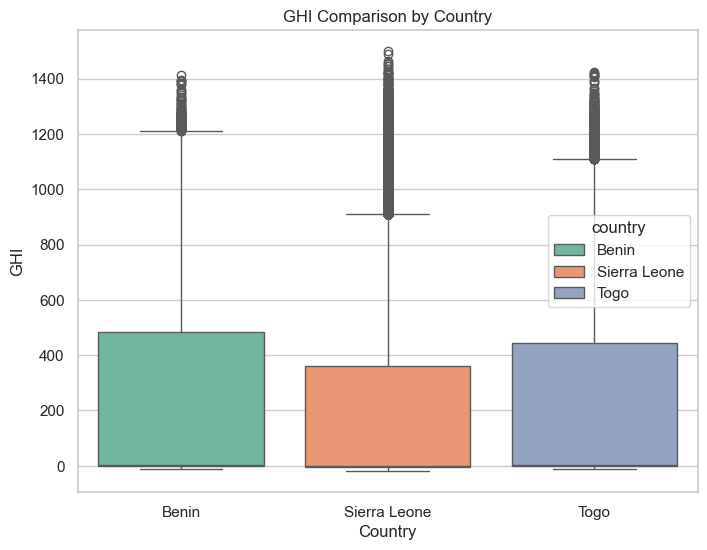

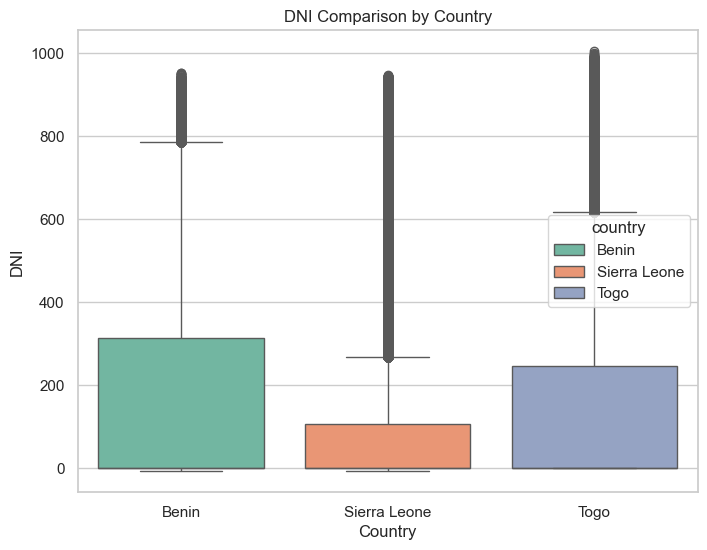

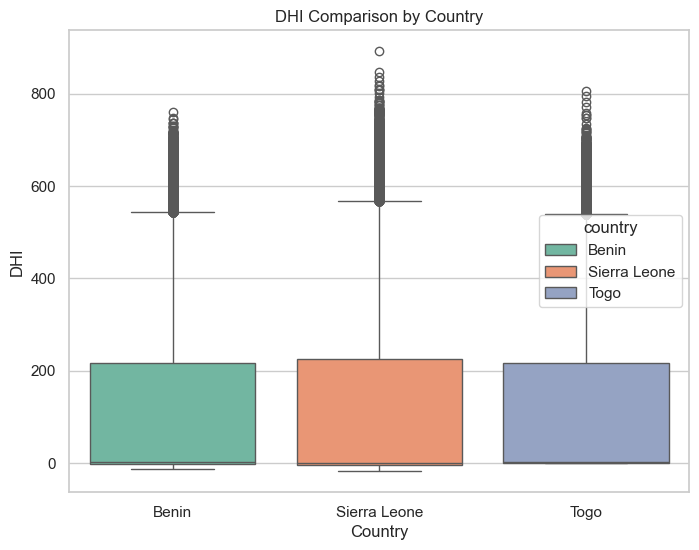

In [8]:
# Generate visualizations
visualizer = VisualizationManager([benin, sierraleone, togo])
visualizer.plot_boxplots()

## Visual Summary: Ranking by Average GHI


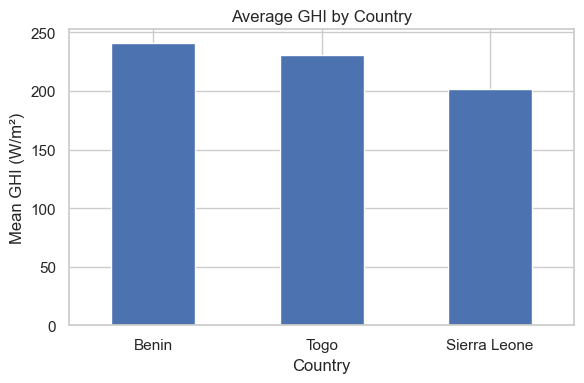

In [9]:
visualizer.bar_chart()